# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 6 - Classificação KNN</font>

#### Classificação KNN em Python - Carregando e Explorando o Dataset

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
digitos = datasets.load_digits()

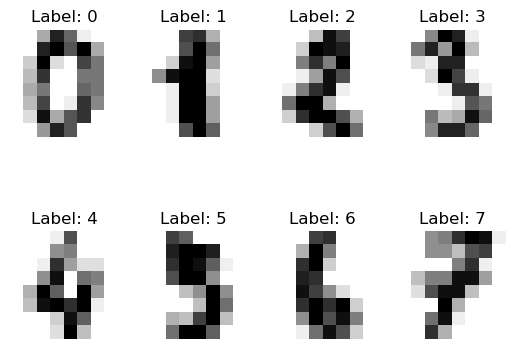

In [3]:
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Label: %i" % label)

In [4]:
X = digitos.data
Y = digitos.target

print(X.shape, Y.shape)

(1797, 64) (1797,)


In [5]:
X_treino, testeData, Y_treino, testeLabels = train_test_split(
    X, Y, test_size=0.30, random_state=101
)

treinoData, validData, treinoLabels, validLabels = train_test_split(
    X_treino, Y_treino, test_size=0.1, random_state=84
)

In [6]:
print("Train examples: {}".format(len(treinoLabels)))
print("Validation examples: {}".format(len(validLabels)))
print("Test examples: {}".format(len(testeLabels)))

Train examples: 1131
Validation examples: 126
Test examples: 540


In [7]:
X_norm = np.mean(X, axis = 0)

X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


In [8]:
kVals = range(1, 30, 2)
acuracias = []


for k in kVals:
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(treinoData, treinoLabels)

    score = modeloKNN.score(validData, validLabels)
    acuracias.append(score)

i = np.argmax(acuracias)
print(
    f"The K value of {kVals[i]} achieved highest accuracy of {acuracias[i] * 100:.2f}% on validation data!"
)

The K value of 3 achieved highest accuracy of 100.00% on validation data!


In [9]:
finalModel = KNeighborsClassifier(n_neighbors = kVals[i])
finalModel.fit(treinoData, treinoLabels)
predictions = finalModel.predict(testeData)

In [10]:

print("EVALUATION ON TESTING DATA")
print(classification_report(testeLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [11]:
# Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(testeLabels, predictions))

Confusion matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Digit predicted: 1


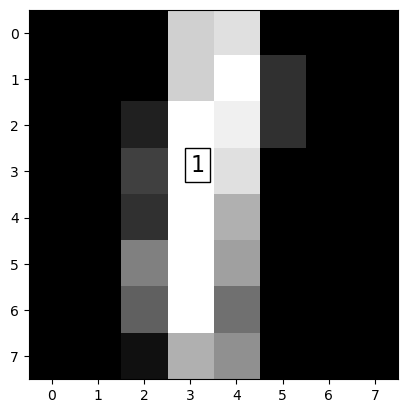

Digit predicted: 2


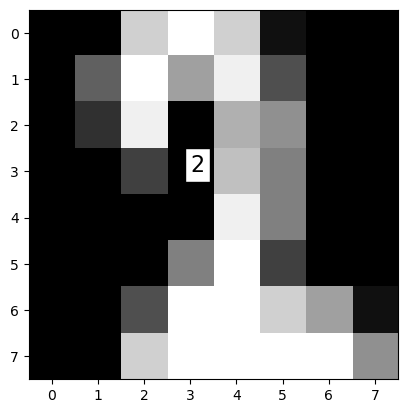

Digit predicted: 9


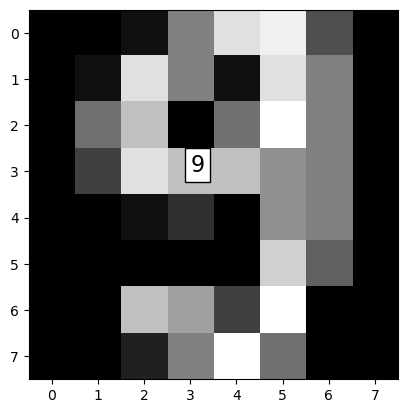

Digit predicted: 4


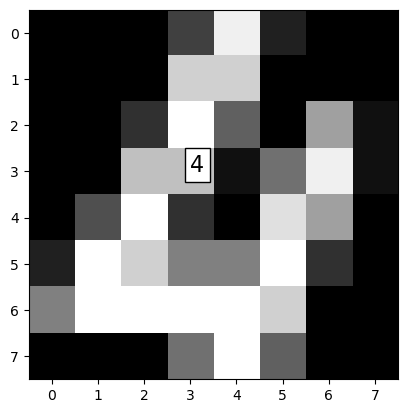

Digit predicted: 6


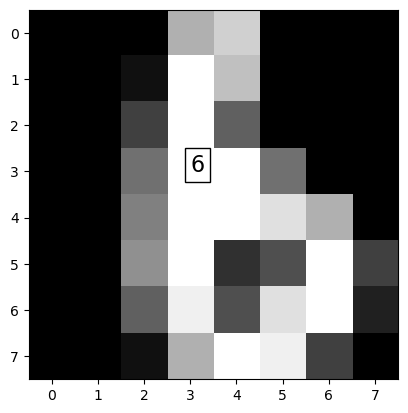

In [12]:
for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
    image = testeData[i]
    prediction = finalModel.predict([image])[0]

    imgdata = np.array(image, dtype="float")
    pixels = imgdata.reshape((8, 8))
    print(f"Digit predicted: {prediction}")
    plt.imshow(pixels, cmap="gray")
    plt.annotate(prediction, (3, 3), bbox={"facecolor": "white"}, fontsize=16)

    plt.show()

In [17]:
newDigit = [
    0.0,
    0.0,
    0.0,
    8.0,
    15.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    12.0,
    14.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    3.0,
    16.0,
    7.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    6.0,
    16.0,
    2.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    7.0,
    16.0,
    16.0,
    13.0,
    5.0,
    0.0,
    0.0,
    0.0,
    15.0,
    16.0,
    9.0,
    9.0,
    14.0,
    0.0,
    0.0,
    0.0,
    3.0,
    14.0,
    9.0,
    2.0,
    16.0,
    2.0,
    0.0,
    0.0,
    0.0,
    7.0,
    15.0,
    16.0,
    11.0,
    0.0,
]

newDigit_norm = newDigit - X_norm
new_predict = finalModel.predict([newDigit_norm])

Digit predicted: [6]


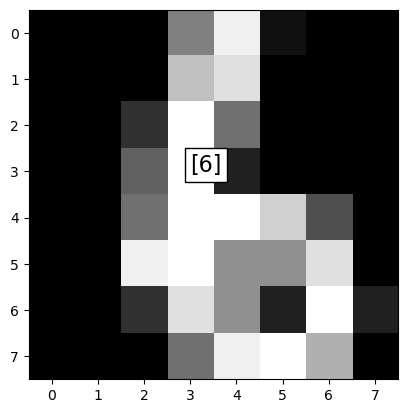

In [18]:
imgdata = np.array(newDigit, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(new_predict,(3,3), bbox={'facecolor':'white'},fontsize=16)
print(f"Digit predicted: {new_predict}")
plt.show()

In [19]:
new_digit = [
    0.0,
    0.0,
    0.0,
    1.0,
    11.0,
    9.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    7.0,
    16.0,
    13.0,
    0.0,
    0.0,
    0.0,
    0.0,
    4.0,
    14.0,
    16.0,
    9.0,
    0.0,
    0.0,
    0.0,
    10.0,
    16.0,
    11.0,
    16.0,
    8.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    3.0,
    16.0,
    6.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    3.0,
    16.0,
    8.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    5.0,
    16.0,
    10.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    2.0,
    14.0,
    6.0,
    0.0,
    0.0,
]

new_digit_norm = new_digit - X_norm

new_predict = finalModel.predict([new_digit_norm])

Predicted digit: [1]


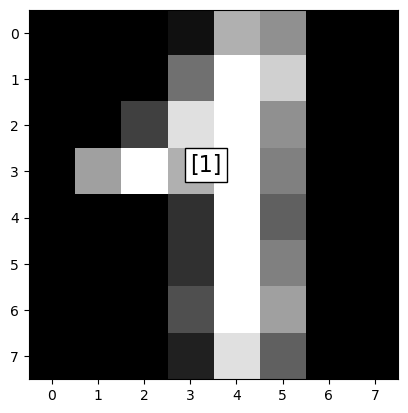

In [20]:
imgdata = np.array(new_digit, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(new_predict,(3,3), bbox={'facecolor':'white'},fontsize=16)
print(f"Predicted digit: {new_predict}")
plt.show()